# ENPH 213 - Week 7 Lab

In this lab, we will be working on Discrete Fourier Transforms and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab7, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10).

## Part 1

Create two windowing functions.

The first is a Trapezoidal Window function $trapWindow(x)$ that rises in the first 10% and falls in the final 10% of the points.  It should be at its maximum value for all points in between.

The second function is $sineWindow(x)$ that uses the first lobe of a sine wave (from 0 to $\pi$).

Both of these window functions should accomodate an input data set with an arbitrary, even number of points.  

Plot the functions for 50 points within the range of $-1 \leq x \leq 1$.


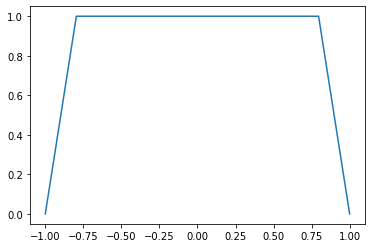

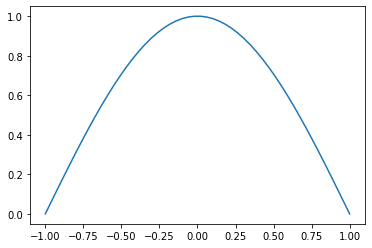

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Trapazoidal Window Function:
x = np.linspace(-1, 1, 50)
# function = np.ones_like(x) # returns an array of ones the same shape as given array
def trapWindow(x):
    WinTrap = np.zeros(x.size)
    P_1 = x.size//10 # first 10%
    P_2 = x.size - x.size // 10 # alast 10%
    #maximum = x.size
    for i in range(1, x.size-1):
        if i <= P_1: # first 10% range
            WinTrap[i] = i / P_1 # slope
        elif i >= P_2: # last 10% range
            WinTrap[i] = 1 + (P_2 - (i + 1)) / P_1 # slope
        else: # flat top
            WinTrap[i] = 1.0 # flat top
    return WinTrap # return the function
# sine window function
def sineWindow(x): 
    return np.sin((np.pi*(x+1)/2))

plt.plot(x, trapWindow(x))
plt.show()
plt.plot(x, sineWindow(x))
plt.show()

# Part 2

Create a data set of the linear funcion $f(t) = 2t$ with 30 regularly spaced points between  $-\pi \leq t \leq \pi$.  Manually set the first and last points to zero as a basic windowing protocol.  This creates a sawtooth function.

Create a function $myDFT(t, y)$ that calculates and prints the $a_k$ and $b_k$ coefficients using the forms for discrete Fourier Transforms.  Once found, create a second function $plotFourier(t, ak, bk, omega)$ that returns the evaluated Fourier expansion and plots the Fourier series expansion using the Fourier coefficients as input.  Plot the function using 201 points in graph.

Remember that when you remove the last point, your data set will have an odd number of points. 

(array([-2.51327412e-01,  2.49747118e-01, -2.45026109e-01,  2.37223755e-01,
        -2.26438174e-01,  2.12805002e-01, -1.96495683e-01,  1.77715318e-01,
        -1.56700078e-01,  1.33714245e-01, -1.09046877e-01,  8.30081820e-02,
        -5.59256105e-02,  2.81397420e-02,  4.06436427e-15, -2.81397420e-02,
         5.59256105e-02, -8.30081820e-02,  1.09046877e-01, -1.33714245e-01,
         1.56700078e-01, -1.77715318e-01,  1.96495683e-01, -2.12805002e-01,
         2.26438174e-01]),
 array([ 0.        ,  2.1391633 , -1.0345828 ,  0.65170672, -0.45022956,
         0.32238786, -0.23249787,  0.16545909, -0.11387932,  0.07378294,
        -0.04289516,  0.01986411, -0.00387532, -0.00555071,  0.00866646,
        -0.00555071, -0.00387532,  0.01986411, -0.04289516,  0.07378294,
        -0.11387932,  0.16545909, -0.23249787,  0.32238786, -0.45022956]))

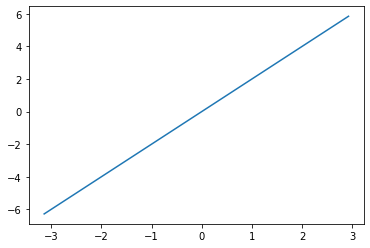

In [76]:
# draw 2t from -pi to pi to create sawtooth function (will give a straight line)
t = np.linspace(-np.pi, np.pi, 30)
t = t[0:-1]
y = 2*t

plt.plot(t, y)

def myDFT(t,y):
    k_max = len(t)
    T = t[-1] - t[0]
    #print(T)
    omega = 2 * np.pi / T
    kmax = N // 2 # floor division
    #print(kmax)

    ak = np.zeros(kmax)
    bk = np.zeros(kmax)

    for k in range(0, kmax):
        ak[k] = np.sum(y * np.cos(k*omega*t)) / kmax
        bk[k] = np.inner(y, np.sin(k*omega*t)) / kmax
    return ak, bk
        
def plotFourier(t, ak, bk, omega):
    Fout = np.zeros(t.size)
    Fout = Fout + ak[0]/2
    for k in range(1, ak.size):
        Fout = Fout + ak[k]*np.cos(k*omega*t) + bk[k] * np.sin(k*omega*t)
    return Fout

myDFT(t,y)

# Part 3

Use the two windowing functions from Part 1 (separately) on the sawtooth function from Part 2.  Determine and print the coefficients and plot the figures.

**Question: Which windowing function seems to work best?**

# Part 4

Create a function $cDFT(t, y)$ that calculates and prints the $c_k$ coefficients using the complex form for discrete Fourier transforms. Be sure to comment on the format of the output array.  Once found, plot the absolute value of the coefficients against the "frequencies" $k \omega$ of the Fourier transform.  Note, there are no negative frequencies, but it is sometimes useful to plot them for visual analysis.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.